<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.1: ODE Initial Value Problem Statement**\
An ordinary differential equation is only in one dimension. It is the relationship between the independent variable x, function f(x) and its derivatives. The order of the derivative can be any n. It is possible to find exact solutions to simpler ODEs, but as the complexity increases, we need to use numerical methods to approximate the solutions.

**22.2: Reduction of Order**\
Many methods such as the Euler method are meant to solve first order differential equations. To use these methods higher order ODEs must be reduced in order.\
u'(t) = au(t) - bu(t)v(t)\
v'(t) = cu(t)v(t) - dv(t)\
S(t) = [u(t); v(t)]\
S'(t) = [a bu(t); cv(t) d]S(t)

**22.3: The Euler Method**

[1.]
[2]


100%|██████████| 10/10 [00:00<00:00, 8397.01it/s]


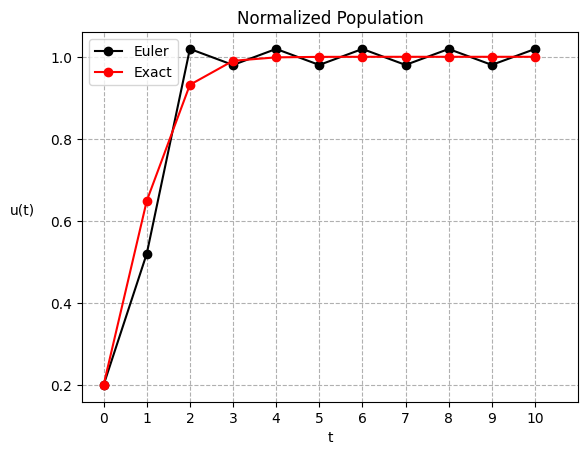

In [9]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt

# We can define an Euler Method function:

def myeuler(f,tspan,u0,N,params):
  h = np.diff(tspan) / N     # step size, (b-a)/N; N=num. of intervals
  print(h)
  print(params)
  t = np.linspace(*tspan,N+1) # t = [a,b] with N+1 points
  u = np.zeros((len(t),*np.array(u0).shape)) # initialize state object
  u[0] = np.array(u0) # initial condition (casting in case u0 is scalar)
  for k in tqdm.trange(N): # extrapolate with progress bar
    f1     = f(t[k],u[k],params)
    u[k+1] = u[k] + h * f1
  return t,u

# here is a logistic different equation IVP problem

def logistic_rhs(t,u,*args):
  return np.array(args)*u*(1-u)
A  = np.array([2])
u0 = 0.2*np.ones(len(A))
ts = [0,10]
N = 10
t,uEu = myeuler(logistic_rhs,ts,u0,N,A)

# we can plot the Euler approximation and the exact solution

plt.plot(t,uEu,'ko-')
plt.xticks(np.arange(ts[-1]+1))
plt.xlabel('t')
plt.ylabel('u(t)',rotation=0,labelpad=20)
plt.title('Normalized Population')
plt.xlim(-0.5,11)
plt.grid(linestyle='--')

x = np.linspace(0,10,11)
plt.plot(x, np.exp(2*x)/(np.exp(2*x)+4),'ro-') #exact
plt.legend(['Euler','Exact'])
#the Euler approximation is quite good in this case

[0.2]
[0.8, 0.01, 0.6, 0.1]


100%|██████████| 100/100 [00:00<00:00, 21089.62it/s]


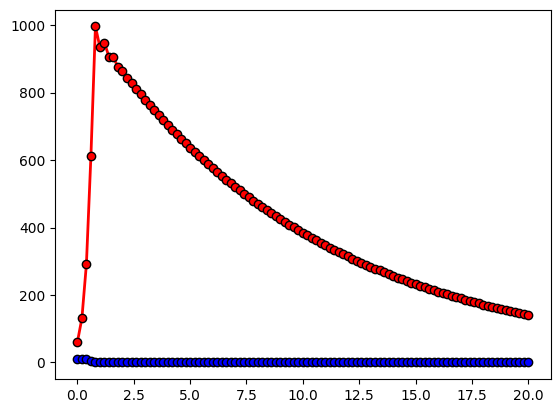

In [10]:
#Here is an IVP system

def predprey(t,u,params): #define IVP system
  a,b,c,d = params
  u1,v = u
  dudt = a*u1 - b*u1*v
  dvdt = c*u1*v - d*v
  dudt = np.r_[dudt,dvdt].reshape(u.shape)
  return dudt

params = a, b, c, d = [0.8, 0.01, 0.6, 0.1]
u0 = [10,60]
ts = [0,20]
N = 100

t,u = myeuler(predprey,ts,u0,N,params)
plt.plot(t,u[:,0],'bo-',lw=2,label=r'Euler $u(t)$',mec='k')
plt.plot(t,u[:,1],'ro-',lw=2,label=r'Euler $v(t)$',mec='k')